## W pdfs by Pope regime and MJO index

This code views the pdfs of vertical velocity generated by dask over the CPOL/Berrima dataset.

In [1]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline

In [2]:
pope_regime = 0
data_path = '/home/rjackson/data/'
#regime_names = ['Deep West', 
#                'Moist East', 
#                'East', 
#                'Dry East', 
#                'Shallow West']
regime_names = ['Break', 'Monsoon']

In [3]:
num_levels = 40
num_regimes = 2
mean = np.zeros((num_levels, 8, num_regimes))*np.nan
median = np.zeros((num_levels, 8, num_regimes))*np.nan
ninety = np.zeros((num_levels, 8, num_regimes))*np.nan
ninety_five = np.zeros((num_levels, 8, num_regimes))*np.nan
ninety_nine = np.zeros((num_levels, 8, num_regimes))*np.nan
z = np.zeros(num_levels)
for pope_regimes in range(0, num_regimes): 
    
    for mjo_indicies in range(1,9):
        mjo_file = (data_path + 
                    'wpdfdros' + 
                     str(pope_regimes) + 
                    '_MJO' + 
                    str(mjo_indicies) +
                    '_varble1.cdf')
        try:
            file_cdf = Dataset(mjo_file, 'r')
            mean[:,mjo_indicies-1,pope_regimes] = file_cdf.variables['mean'][:]
            median[:,mjo_indicies-1,pope_regimes] = file_cdf.variables['median'][:]
            ninety[:,mjo_indicies-1,pope_regimes] = file_cdf.variables['ninety'][:]
            ninety_five[:,mjo_indicies-1,pope_regimes] = file_cdf.variables['ninety_five'][:]
            ninety_nine[:,mjo_indicies-1,pope_regimes] = file_cdf.variables['ninety_nine'][:]
            z = file_cdf.variables['z'][:]
            file_cdf.close()
        except:
            print('Cannot load')

/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in greater
/home/rjackson/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater


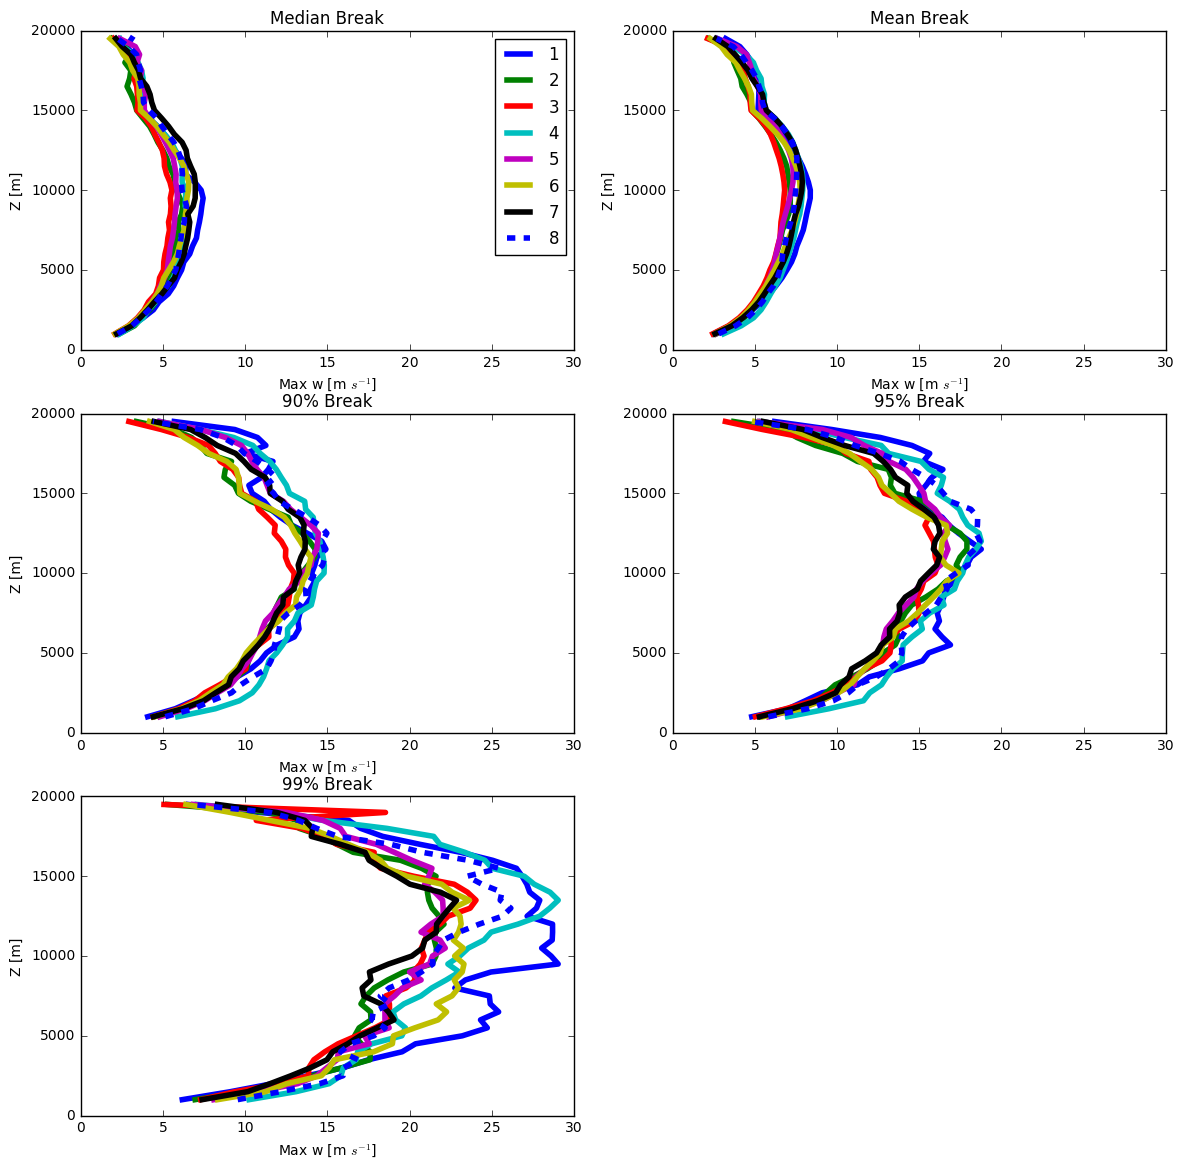

In [4]:
plt.figure(figsize=(14,14))
plt.subplot(321)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(median[:,mjo_indicies,pope_regime], z, linewidth=4)
    else:
        plt.plot(median[:,mjo_indicies,pope_regime], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.legend(['1','2','3','4','5','6','7','8'], loc='best')
plt.xlim([0,30])
plt.title('Median ' + regime_names[pope_regime])
plt.xlabel('Max w [m $s^{-1}$]')
plt.ylabel('Z [m]')

plt.subplot(322)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(mean[:,mjo_indicies,pope_regime], z, linewidth=4)
    else:
        plt.plot(mean[:,mjo_indicies,pope_regime], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,30])
plt.title('Mean ' + regime_names[pope_regime])
plt.xlabel('Max w [m $s^{-1}$]')
plt.ylabel('Z [m]')
plt.subplot(323)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety[:,mjo_indicies,pope_regime], z, linewidth=4)
    else:
        plt.plot(ninety[:,mjo_indicies,pope_regime], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,30])
plt.xlabel('Max w [m $s^{-1}$]')
plt.ylabel('Z [m]')
plt.title('90% ' + regime_names[pope_regime])

plt.subplot(324)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety_five[:,mjo_indicies,pope_regime], 
                 z,
                 linewidth=4)
    else:
        plt.plot(ninety_five[:,mjo_indicies,pope_regime], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,30])

plt.title('95% ' + regime_names[pope_regime])
plt.subplot(325)
for mjo_indicies in range(0,8):
    if(mjo_indicies < 7):
        plt.plot(ninety_nine[:,mjo_indicies,pope_regime], 
                 z,
                 linewidth=4)
    else:
        plt.plot(ninety_nine[:,mjo_indicies,pope_regime], 
                 z, 
                 linestyle='--',
                 linewidth=4)
plt.xlim([0,30])
plt.title('99% ' + regime_names[pope_regime])
plt.xlabel('Max w [m $s^{-1}$]')
plt.ylabel('Z [m]')

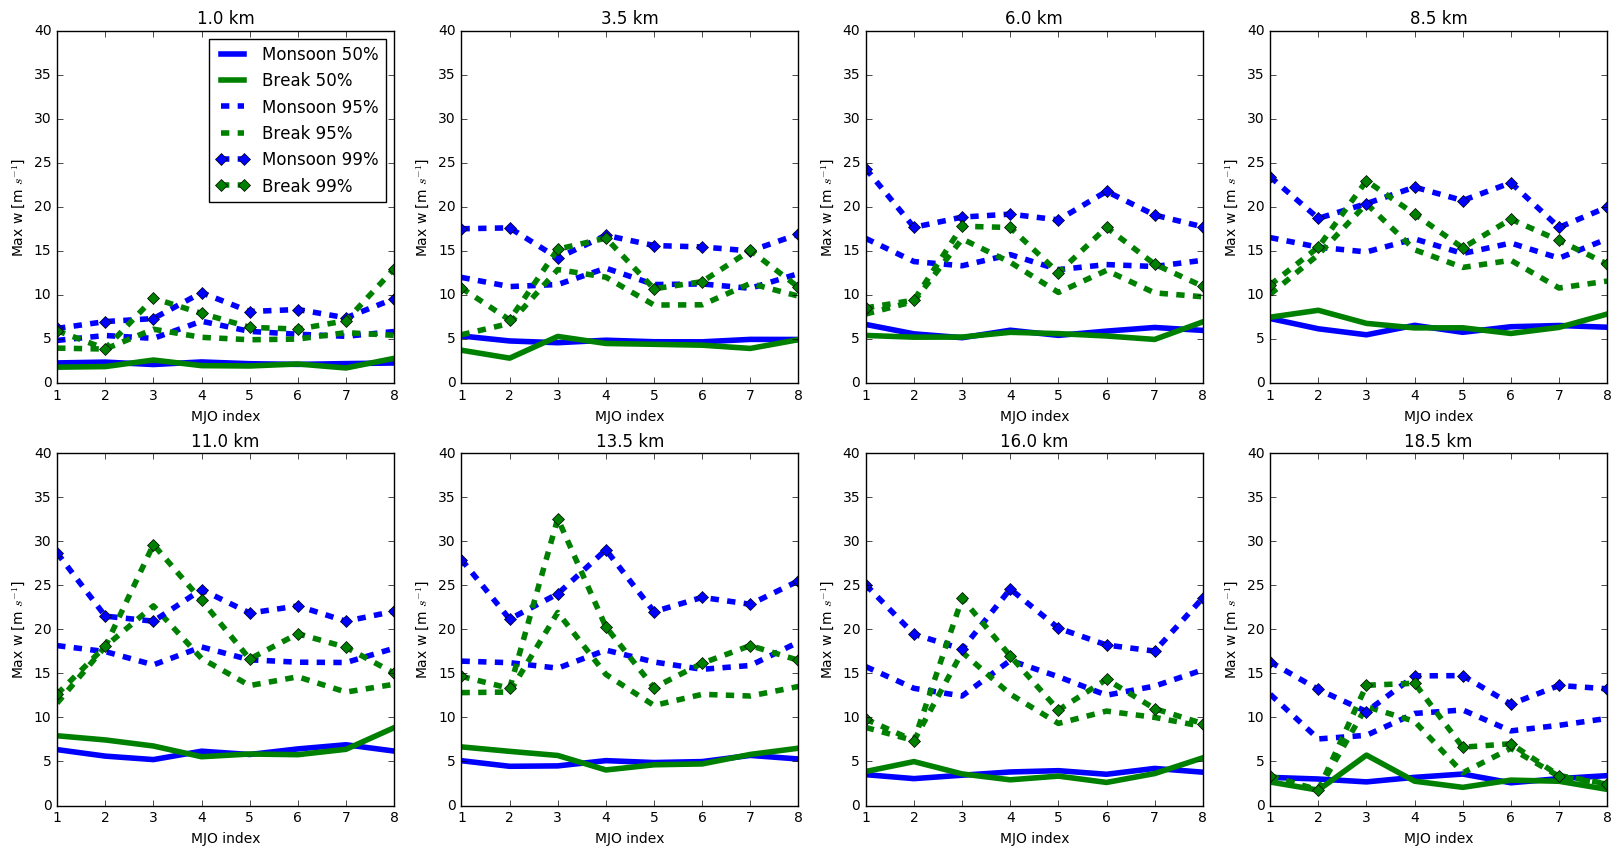

In [5]:
f, axarr = plt.subplots(2, 4, figsize=(20,10))
for sub_levels in range(0,8):
    if(sub_levels == 0):
        second_index = 0
    else:
        second_index = sub_levels % 4

    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                          median[sub_levels*5+1, :, 0],
                                                          linewidth=4, color="b")
    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                     median[sub_levels*5+1, :, 1],
                                                     linewidth=4, color="g")
    #axarr[np.floor(sub_levels/2), second_index].plot(range(1,9), 
    #                                                 ninety[sub_levels*5, :, 0],
    #                                                 linewidth=4, color="b",
    #                                                 linestyle='--')
    #axarr[np.floor(sub_levels/2), second_index].plot(range(1,9), 
    #                                                 ninety[sub_levels*5, :, 1],
    #                                                 linewidth=4, color="g",
    #                                                 linestyle='--')
    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                          ninety_five[sub_levels*5+1, :, 0],
                                                          linewidth=4, color="b",
                                                          linestyle='--')
    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                          ninety_five[sub_levels*5+1, :, 1],
                                                          linewidth=4, color="g",
                                                          linestyle='--')
    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                          ninety_nine[sub_levels*5+1, :, 0],
                                                          linewidth=4, color="b",
                                                          marker='D', linestyle='--')
    axarr[int(np.floor(sub_levels/4)), second_index].plot(range(1,9), 
                                                          ninety_nine[sub_levels*5+1, :, 1],
                                                          linewidth=4, color="g",
                                                          marker='D', linestyle='--')
    
    axarr[int(np.floor(sub_levels/4)), second_index].set_ylim([0, 40])
    axarr[int(np.floor(sub_levels/4)), second_index].set_ylabel('Max w [m $s^{-1}$]')
    axarr[int(np.floor(sub_levels/4)), second_index].set_xlabel('MJO index')
    axarr[int(np.floor(sub_levels/4)), second_index].set_title(str(z[sub_levels*5+1]/1e3) + ' km')
    
axarr[0, 0].legend(['Monsoon 50%', 'Break 50%',
                    'Monsoon 95%', 'Break 95%',
                    'Monsoon 99%', 'Break 99%'],
                   loc='best')

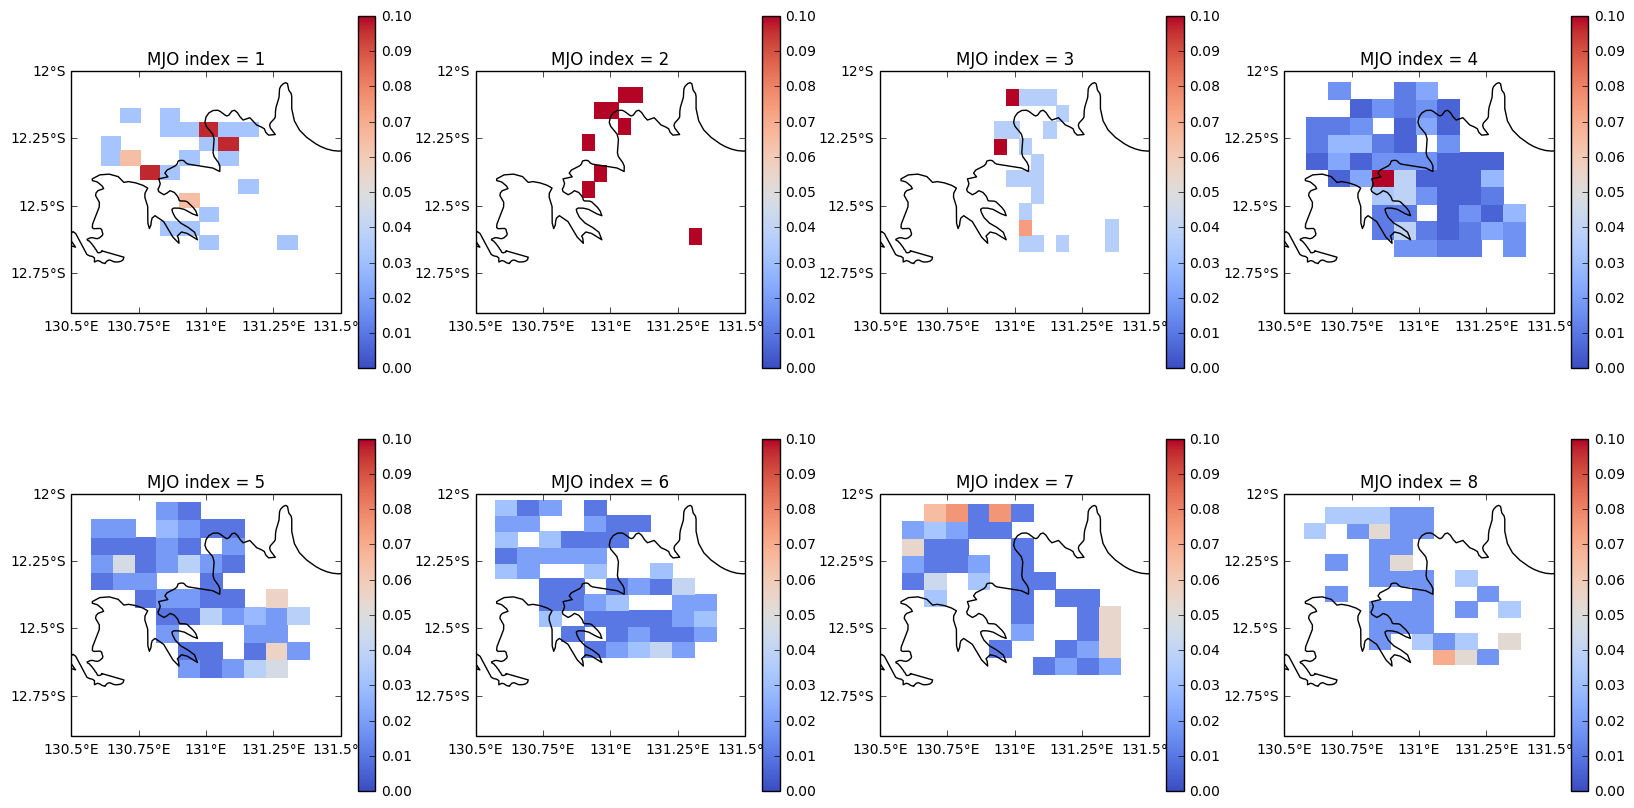

In [15]:
fig, ax = plt.subplots(2, 4, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(20,10))
for mjo_index in range(1,9):
    the_netcdf = ('/home/rjackson/data/latlon1_MJO' + str(mjo_index) + '_varble.cdf')
    the_ind = int((mjo_index-1)/4)
    latlon_cdf = Dataset(the_netcdf, mode='r')
    max_w = latlon_cdf['max_w'][:]
    lat = latlon_cdf['lat'][:]
    lon = latlon_cdf['lon'][:]
    ax[the_ind, (mjo_index-1) % 4].coastlines(resolution='10m')
    ax[the_ind, (mjo_index-1) % 4].set_xticks([129, 130, 131, 132, 133], crs=ccrs.PlateCarree())
    ax[the_ind, (mjo_index-1) % 4].set_yticks([-14, -13.5, -13, -12.5, -12,
                                                   -11.5, -11,-10.5,], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax[the_ind, (mjo_index-1) % 4].xaxis.set_major_formatter(lon_formatter)
    ax[the_ind, (mjo_index-1) % 4].yaxis.set_major_formatter(lat_formatter)
    indicies = np.where(max_w > 5)
    the_hist, x_bins, y_bins = np.histogram2d(lon[indicies], lat[indicies], bins=10)
    the_hist = np.ma.masked_where(the_hist == 0, the_hist)
    x_mesh, y_mesh = np.meshgrid(x_bins, y_bins)
    the_plot = ax[the_ind, (mjo_index-1) % 4].pcolormesh(x_mesh, y_mesh, the_hist/np.sum(the_hist), cmap='coolwarm',
                                                         vmin=0, vmax=0.1)
    plt.colorbar(the_plot, ax=ax[the_ind, (mjo_index-1) % 4])
    ax[the_ind, (mjo_index-1) % 4].set_xlim((130.5, 131.5))
    ax[the_ind, (mjo_index-1) % 4].set_ylim((-12.9, -12))
    ax[the_ind, (mjo_index-1) % 4].set_xticks([130.5, 130.75, 131.0, 131.25, 131.5])
    ax[the_ind, (mjo_index-1) % 4].set_yticks([-12.75, -12.5, -12.25, -12])
    ax[the_ind, (mjo_index-1) % 4].set_title('MJO index = ' + str(mjo_index))

In [22]:
hist_mjo_break10 = np.zeros(8)
hist_mjo_monsoon10 = np.zeros(8)
hist_mjo_break5 = np.zeros(8)
hist_mjo_monsoon5 = np.zeros(8)
hist_mjo_break1 = np.zeros(8)
hist_mjo_monsoon1 = np.zeros(8)
for mjo_index in range(1,9):
    the_netcdf = ('/home/rjackson/data/latlon1_MJO' + str(mjo_index) + '_varble.cdf')
    the_ind = int((mjo_index-1)/4)
    latlon_cdf = Dataset(the_netcdf, mode='r')
    max_w = latlon_cdf['max_w'][:]
    hist_mjo_monsoon10[mjo_index-1] = len(max_w[max_w > 10])
    hist_mjo_monsoon5[mjo_index-1] = len(max_w[max_w > 5])
    hist_mjo_monsoon1[mjo_index-1] = len(max_w[max_w > 1])
    the_netcdf = ('/home/rjackson/data/latlon0_MJO' + str(mjo_index) + '_varble.cdf')
    the_ind = int((mjo_index-1)/4)
    latlon_cdf = Dataset(the_netcdf, mode='r')
    max_w = latlon_cdf['max_w'][:]
    hist_mjo_break10[mjo_index-1] = len(max_w[max_w > 10])
    hist_mjo_break5[mjo_index-1] = len(max_w[max_w > 5])
    hist_mjo_break1[mjo_index-1] = len(max_w[max_w > 1])

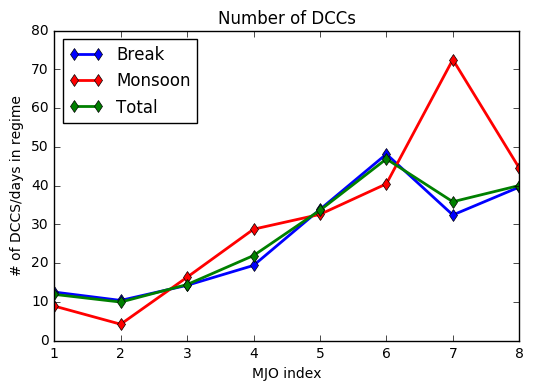

In [25]:
days_break = np.array([46, 67, 58, 48, 55, 36, 43, 22])
days_monsoon = np.array([9,  5,  6 , 18, 11,  7,  4,  2])
days_total = days_break+days_monsoon
weights_break = days_break/sum(days_break)
weights_monsoon = days_monsoon/sum(days_monsoon)
weights_total = days_total/sum(days_total)
plt.plot(range(1,9), hist_mjo_break1/days_break, linewidth=2, color='b', marker='d')
plt.plot(range(1,9), hist_mjo_monsoon1/days_monsoon, linewidth=2, color='r', marker='d')
plt.plot(range(1,9), (hist_mjo_monsoon1+hist_mjo_break1)/days_total, linewidth=2, color='g', marker='d')
plt.legend(['Break', 'Monsoon', 'Total'], loc='best')
plt.ylabel('# of DCCS/days in regime')
plt.xlabel('MJO index')
plt.title('Number of DCCs')

In [26]:
np.sum(hist_mjo_break1[3:7]/days_break[3:7]+hist_mjo_monsoon1[3:7]/days_monsoon[3:7])/np.sum(hist_mjo_break1/days_break+hist_mjo_monsoon1/days_monsoon)

0.67153790901451049